In [1]:
import pandas as pd
import os
import io
from pathlib import Path
import numpy as np
import re
import shutil
import pickle


import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_all = pd.read_excel("Data/paper_final_30Jan.xlsx", usecols="B:K")
df_all

,JO,AU,TI,PY,DI,urls,filename
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt
...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN


In [10]:
df_all.filename.isnull().sum()

114

In [36]:
# source_dir = 'Data/paper_all'
# target_dir = 'Data/pap_exclude'
    
# file_names = os.listdir(source_dir)
    
# for file_name in file_names:
#     if file_name not in df_all.filename.values:
#         shutil.move(os.path.join(source_dir, file_name), target_dir)

In [37]:
df_all[df_all.filename.notnull()]

,JO,AU,TI,PY,DI,urls,filename
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt
...,...,...,...,...,...,...,...
3220,JHTR,"Tajeddini, K","CUSTOMER ORIENTATION, LEARNING ORIENTATION, AN...",2011.0,10.1177/1096348010380599,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_1.txt
3221,JHTR,"Cheng, S; Cho, V",AN INTEGRATED MODEL OF EMPLOYEES' BEHAVIORAL I...,2011.0,10.1177/1096348010384598,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_3.txt
3222,JHTR,"Swanson, SR; Hsu, MK",THE EFFECT OF RECOVERY LOCUS ATTRIBUTIONS AND ...,2011.0,10.1177/1096348010382237,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_4.txt
3223,JHTR,"Clemes, MD; Gan, C; Ren, M","SYNTHESIZING THE EFFECTS OF SERVICE QUALITY, V...",2011.0,10.1177/1096348010382239,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_5.txt


In [39]:
source_dir = 'Data/paper_all'
target_dir = 'Data/pap_exclude'
    
file_names = os.listdir(source_dir)
    

In [ ]:
for file_name in file_names:
    if file_name not in df_all.filename.values:
        shutil.move(os.path.join(source_dir, file_name), target_dir)

In [42]:
len(file_names)

3153

In [44]:
df_all[~df_all.filename.isin(file_names)]

,JO,AU,TI,PY,DI,urls,filename
871,IJCHM,"Hyun, SS; Han, H",A model of a patron's innovativeness formation...,2012.0,NaN,NaN,IJCHM_No Url
2634,CHQ,"Thompson, GM","Inaccuracy of the ""Naive Table Mix"" Calculations",2011.0,10.1177/1938965511398261,https://journals.sagepub.com/doi/pdf/10.1177/1...,CHQ_4364.txt
2645,CHQ,"Millar, M; Baloglu, S",Hotel Guests' Preferences for Green Guest Room...,2011.0,10.1177/1938965511409031,NaN,NaN
2646,CHQ,"Tews, MJ; Stafford, K; Tracey, JB",What Matters Most? The Perceived Importance of...,2011.0,10.1177/1938965510363377,NaN,NaN
2647,CHQ,"Palacios-Marques, D; Ribeiro-Soriano, D; Gil-P...",The Effect of Learning-Based Distinctive Compe...,2011.0,10.1177/1938965510391654,NaN,NaN
...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN


In [49]:
# df_all.loc[2634, "filename"]= np.nan

In [50]:
# df_all.filename.isnull().sum()

In [48]:
# df_all.to_excel("Data/paper_12Feb.xlsx", index=False)

In [52]:
source_dir = 'Data/paper_all'
    
file_names = os.listdir(source_dir)

In [53]:
df_text = df_all.copy() 

In [92]:
file_names[7]

'CHQ_109.txt'

In [123]:
# for i in range(len(df_all)

with io.open(f"{source_dir}/{file_names[0]}", "r", encoding="utf-8") as doc:
    f= doc.read()

In [124]:
len(f)

20113

In [125]:
# pat= r"\*\*\*\*\*.{0,20}[Mm]ethod[\S\s]+?\*{3}"

In [ ]:
# re.search(pat, f).group()

In [127]:
df_all

,JO,AU,TI,PY,DI,urls,filename
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt
...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN


In [129]:
df_all["methodology"]=np.nan

In [130]:
df_all

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,NaN
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,NaN
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,NaN
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,NaN
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,NaN
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,NaN
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,NaN
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,NaN
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,NaN


In [180]:
source_dir = 'Data/paper_all'
pat= r"\*{5}.{0,30}[Mm]ethod[\S\s]+?\*{3}"

for i in range(len(df_all)):
    if df_all.loc[i,'filename'] is not np.nan:
        with io.open(f"{source_dir}/{df_all.loc[i,'filename']}", "r", encoding="utf-8") as doc:
            f= doc.read()

        if re.search(pat, f):
            df_all.loc[i, "methodology"]= re.search(pat, f).group()
        else:
            df_all.loc[i, "methodology"]= "No section"     
    
    

In [181]:
df_all

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,*****Methodology\nThe design is qualitative an...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,No section
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,*****3. Research method\nWe searched the empir...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,*****Methods\nParticipants\nEmployees from ope...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,*****Method\nDesign\nParticipants made dining ...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,NaN
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,NaN
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,NaN
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,NaN


In [182]:
df_all[(df_all.methodology.notnull())&(df_all.methodology!="No section")]

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,*****Methodology\nThe design is qualitative an...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,*****3. Research method\nWe searched the empir...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,*****Methods\nParticipants\nEmployees from ope...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,*****Method\nDesign\nParticipants made dining ...
8,IJCHM,"Mulet-Forteza, C; Genovart-Balaguer, J; Merigo...",Bibliometric structure of IJCHM in its 30 years,2019.0,10.1108/IJCHM-10-2018-0828,https://www.emerald.com/insight/content/doi/10...,IJCHM_8.txt,*****3. Methodology\nTo conduct this bibliomet...
...,...,...,...,...,...,...,...,...
3220,JHTR,"Tajeddini, K","CUSTOMER ORIENTATION, LEARNING ORIENTATION, AN...",2011.0,10.1177/1096348010380599,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_1.txt,*****Method\nPretesting\nA questionnaire was d...
3221,JHTR,"Cheng, S; Cho, V",AN INTEGRATED MODEL OF EMPLOYEES' BEHAVIORAL I...,2011.0,10.1177/1096348010384598,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_3.txt,*****Method\nOperationalization of Variables\n...
3222,JHTR,"Swanson, SR; Hsu, MK",THE EFFECT OF RECOVERY LOCUS ATTRIBUTIONS AND ...,2011.0,10.1177/1096348010382237,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_4.txt,*****Method\nData Collection and Sample\nThe c...
3223,JHTR,"Clemes, MD; Gan, C; Ren, M","SYNTHESIZING THE EFFECTS OF SERVICE QUALITY, V...",2011.0,10.1177/1096348010382239,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_5.txt,*****Research Design and Method\nA 7-point Lik...


In [183]:
df_all["methodology"] = df_all.methodology.str.strip("*")

In [184]:
df_all

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,No section
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,NaN
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,NaN
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,NaN
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,NaN


In [186]:
# df_all.to_pickle("df_all.pkl")

In [187]:
df = pd.read_pickle("df_all.pkl")
df

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,No section
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,NaN
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,NaN
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,NaN
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,NaN


In [188]:
df.to_excel("method_sections.xlsx")

In [107]:
df_1 = pd.read_excel("Data/Analysis of Turizm Journals raw 13.02.2021.xlsx", sheet_name=None, usecols="A:AF", header=1)
df_1.keys()
del df_1["General Information"]
df_1 = pd.concat(df_1)
df_1

AU  \
IJCHM 0        Ineson, EM; Comic, D; Kalmic, L   
      1                    Benitez-Aurioles, B   
      2               Hu, XB; Yang, Y; Park, S   
      3    Ahmat, NHC; Arendt, SW; Russell, DW   
      4                    Kim, EL; Tanford, S   
...                                        ...   
JHMM  226                           Morosan, C   
      227             Memarzadeh, F; Chang, HJ   
      228                       Cao, Y; Kim, K   
      229                                  NaN   
      230                                  NaN   

                                                          TI      PY  \
IJCHM 0    Towards a hierarchy of hotel guests' in-room n...  2019.0   
      1    Barcelona's peer-to-peer tourist accommodation...  2019.0   
      2    A meta-regression on the effect of online rati...  2019.0   
      3    Examining work factors after Malaysia's minimu...  2019.0   
      4    Seeking reward or avoiding risk from restauran...  2019.0   
...                                                      ...     ...   
JHMM  226  The Influence of DMO Advertising on Specific D...  2015.0   
      227  Online Consumer Complaints About Southeast Asi...  2015.0   
      228  How Do Customers Perceive Service Quality in D...  2015.0   
      229                                                NaN     NaN   
      230                                                NaN     NaN   

                                     DI QUALITATIVE (0)\nQUANTITATIVE (1)  \
IJCHM 0      10.1108/IJCHM-01-2019-0061                                 0   
      1      10.1108/IJCHM-01-2019-0090                                 1   
      2      10.1108/IJCHM-10-2018-0835                                 0   
      3      10.1108/IJCHM-10-2018-0827                                 1   
      4      10.1108/IJCHM-03-2018-0235                                 1   
...                                 ...                               ...   
JHMM  226  10.1080/19368623.2014.891962                                 1   
      227  10.1080/19368623.2014.893222                                 0   
      228  10.1080/19368623.2014.903817                                 1   
      229                           NaN                               NaN   
      230                           NaN                               NaN   

                     Method  category  CMB  CMV   MB  ...  CBQO  DBQ  UEB  \
IJCHM 0      pheneomenology  CMB-free    0    0  0.0  ...   0.0  0.0  0.0   
      1      secondary data  CMB-free    1    0  0.0  ...   0.0  0.0  0.0   
      2              review  CMB-free    0    0  0.0  ...   0.0  0.0  0.0   
      3              survey  CMB-risk    0    0  0.0  ...   0.0  0.0  0.0   
      4        experimental  CMB-free    0    0  0.0  ...   0.0  0.0  0.0   
...                     ...       ...  ...  ...  ...  ...   ...  ...  ...   
JHMM  226            survey  CMB-risk    0    0  0.0  ...   0.0  0.0  0.0   
      227  content analysis  CMB-free  NaN  NaN  NaN  ...   NaN  NaN  NaN   
      228            survey  CMB-risk    0    0  0.0  ...   0.0  0.0  0.0   
      229               NaN       NaN  NaN  NaN  NaN  ...   NaN  NaN  NaN   
      230               NaN       NaN  NaN  NaN  NaN  ...   NaN  NaN  NaN   

           HSF  PSD  MV.1  GFS  DMLMF  SULMF  Unnamed: 31  
IJCHM 0    0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      1    0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      2    0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      3    0.0  0.0   0.0  0.0    1.0    0.0          NaN  
      4    0.0  0.0   0.0  0.0    0.0    0.0          NaN  
...        ...  ...   ...  ...    ...    ...          ...  
JHMM  226  0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      227  NaN  NaN   NaN  NaN    NaN    NaN          NaN  
      228  0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      229  NaN  NaN   NaN  NaN    NaN    NaN          NaN  
      230  NaN  NaN   NaN  NaN    NaN    NaN          NaN  

[3280 r

In [109]:
df_1[df_1.iloc[:,-1].notnull()]

AU  \
IJCHM 710       Seric, M; Gil-Saura, I; Ozretic-Dosen, D   
      768               Swanson, SR; Huang, YH; Wang, BH   
      798         Magnini, VP; Hyun, S; Kim, B; Uysal, M   
      869       de Faria, MD; da Silva, JF; Ferreira, JB   
      894                                   Karatepe, OM   
IJHM  45                Ye, YJ; Zhu, H; Deng, XC; Mu, ZR   
CHQ   287  Robson, SKA; Kimes, SE; Becker, FD; Evans, GW   
JHTR  323                        Guillet, BD; Tasci, ADA   

                                                          TI      PY  \
IJCHM 710  Insights on integrated marketing communication...  2015.0   
      768  Hospitality-based critical incidents: a cross-...  2014.0   
      798  The influences of collectivism in hospitality ...  2013.0   
      869  The visually impaired and consumption in resta...  2012.0   
      894  Perceived organizational support, career satis...  2012.0   
IJHM  45   Negative workplace gossip and service outcomes...  2019.0   
CHQ   287  Consumers' Responses to Table Spacing in Resta...  2011.0   
JHTR  323  TRAVELERS' TAKES ON HOTEL-RESTAURANT CO-BRANDI...  2010.0   

                                   DI QUALITATIVE (0)\nQUANTITATIVE (1)  \
IJCHM 710  10.1108/IJCHM-12-2013-0568                                 1   
      768  10.1108/IJCHM-03-2012-0033                                 1   
      798  10.1108/IJCHM-07-2012-0127                                 1   
      869   10.1108/09596111211237264                                 1   
      894   10.1108/09596111211237273                                 1   
IJHM  45   10.1016/j.ijhm.2019.04.020                                 1   
CHQ   287    10.1177/1938965511410310                                 1   
JHTR  323    10.1177/1096348009350618                                 1   

           Method     category CMB CMV   MB  ...  CBQO  DBQ  UEB  HSF  PSD  \
IJCHM 710  survey     CMB-free   0   0  0.0  ...   0.0  0.0  0.0  0.0  0.0   
      768  survey     CMB-free   0   0  0.0  ...   0.0  0.0  0.0  0.0  0.0   
      798  survey     CMB-free   0   0  0.0  ...   0.0  0.0  0.0  0.0  0.0   
      869  survey     CMB-free   0   0  0.0  ...   0.0  0.0  0.0  0.0  0.0   
      894  survey  CMB-handled   1   0  1.0  ...   0.0  0.0  0.0  0.0  0.0   
IJHM  45   survey  CMB-handled   1   1  1.0  ...   0.0  0.0  0.0  0.0  0.0   
CHQ   287  survey     CMB-free   0   0  0.0  ...   0.0  0.0  0.0  0.0  0.0   
JHTR  323  survey     CMB-free   0   0  0.0  ...   0.0  0.0  0.0  0.0  0.0   

           MV.1  GFS  DMLMF  SULMF  Unnamed: 31  
IJCHM 710   0.0  0.0    0.0    0.0            *  
      768   0.0  0.0    0.0    0.0          cıt  
      798   0.0  0.0    0.0    0.0          exp  
      869   0.0  0.0    0.0    0.0     conjoint  
      894   0.0  0.0    0.0    0.0            ?  
IJHM  45    0.0  0.0    0.0    0.0            ?  
CHQ   287   0.0  0.0    0.0    0.0          exp  
JHTR  323   0.0  0.0    0.0    0.0          exp  

[8 rows x 32 columns]

In [110]:
df_1 = df_1.dropna(how="all") 

In [111]:
df_1 = df_1.reset_index(level=0)

In [112]:
df_1.rename(columns={'level_0': 'JO'}, inplace=True)

In [113]:
df_1.reset_index(drop=True, inplace=True)

In [114]:
df_1

,JO,AU,TI,PY,DI,QUALITATIVE (0)\nQUANTITATIVE (1),Method,category,CMB,CMV,...,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF,Unnamed: 31
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,pheneomenology,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df_1.isnull().sum()

JO                                      0
AU                                      0
TI                                      0
PY                                     19
DI                                      1
QUALITATIVE (0)\nQUANTITATIVE (1)       3
Method                                  0
category                                0
CMB                                   616
CMV                                   620
MB                                    617
MV                                    618
MSD                                   621
MR                                    623
SR                                    621
SED                                   623
MED                                   621
TSM                                   612
TLD                                   614
PSM                                   618
MSM                                   617
A                                     595
C                                     600
CBQO                              

In [116]:
df_1.columns

Index(['JO', 'AU', 'TI', 'PY', 'DI', 'QUALITATIVE (0)\nQUANTITATIVE (1)',
       'Method', 'category', 'CMB', 'CMV', 'MB', 'MV', 'MSD', 'MR', 'SR',
       'SED', 'MED', 'TSM', 'TLD', 'PSM', 'MSM', 'A', 'C', 'CBQO', 'DBQ',
       'UEB', 'HSF', 'PSD', 'MV.1', 'GFS', 'DMLMF', 'SULMF', 'Unnamed: 31'],
      dtype='object')

In [119]:
df_1.rename(columns={'QUALITATIVE (0)\nQUANTITATIVE (1)':'QUANTITATIVE'}, inplace=True)

In [120]:
df_1.QUANTITATIVE.value_counts()

1                     2653
0                      610
              1-0        1
BOTH(1)                  1
              1-0        1
Name: QUANTITATIVE, dtype: int64

In [121]:
df_1.QUANTITATIVE.unique()

array([0, 1, 'BOTH(1)', '              1-0 ', '              1-0', nan],
      dtype=object)

In [122]:
df_1.loc[df_1.QUANTITATIVE.isin(['              1-0 ', '              1-0']), "QUANTITATIVE"]=1

In [123]:
df_1.QUANTITATIVE.value_counts()

1          2655
0           610
BOTH(1)       1
Name: QUANTITATIVE, dtype: int64

In [124]:
sns.set()

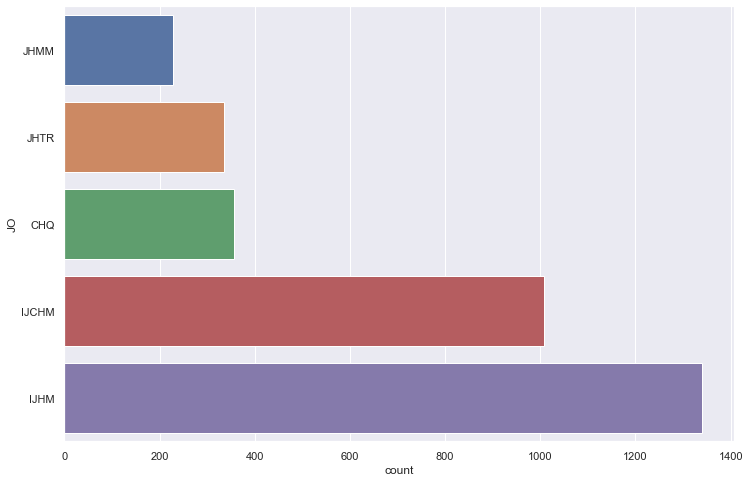

In [125]:
order = df_1.JO.value_counts(ascending=True).index
plt.figure(figsize=(12,8))
sns.countplot(y='JO', data=df_1, orient='h', order=order);

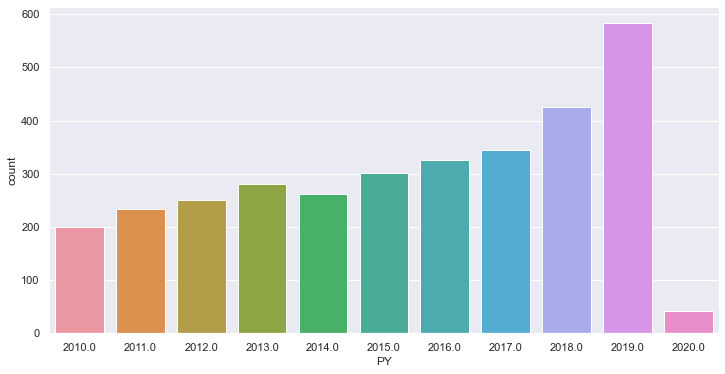

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(x='PY', data=df_1, orient='v');

In [127]:
pd.crosstab(df_1.JO, df_1.PY, dropna=False)

PY,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
JO,,,,,,,,,,,
CHQ,35,47,31,35,35,33,33,28,34,29,13
IJCHM,56,53,52,55,63,86,115,137,172,217,2
IJHM,83,110,144,167,139,131,107,97,124,238,0
JHMM,0,0,0,0,0,35,42,44,42,40,14
JHTR,26,24,24,23,24,17,29,39,54,60,12


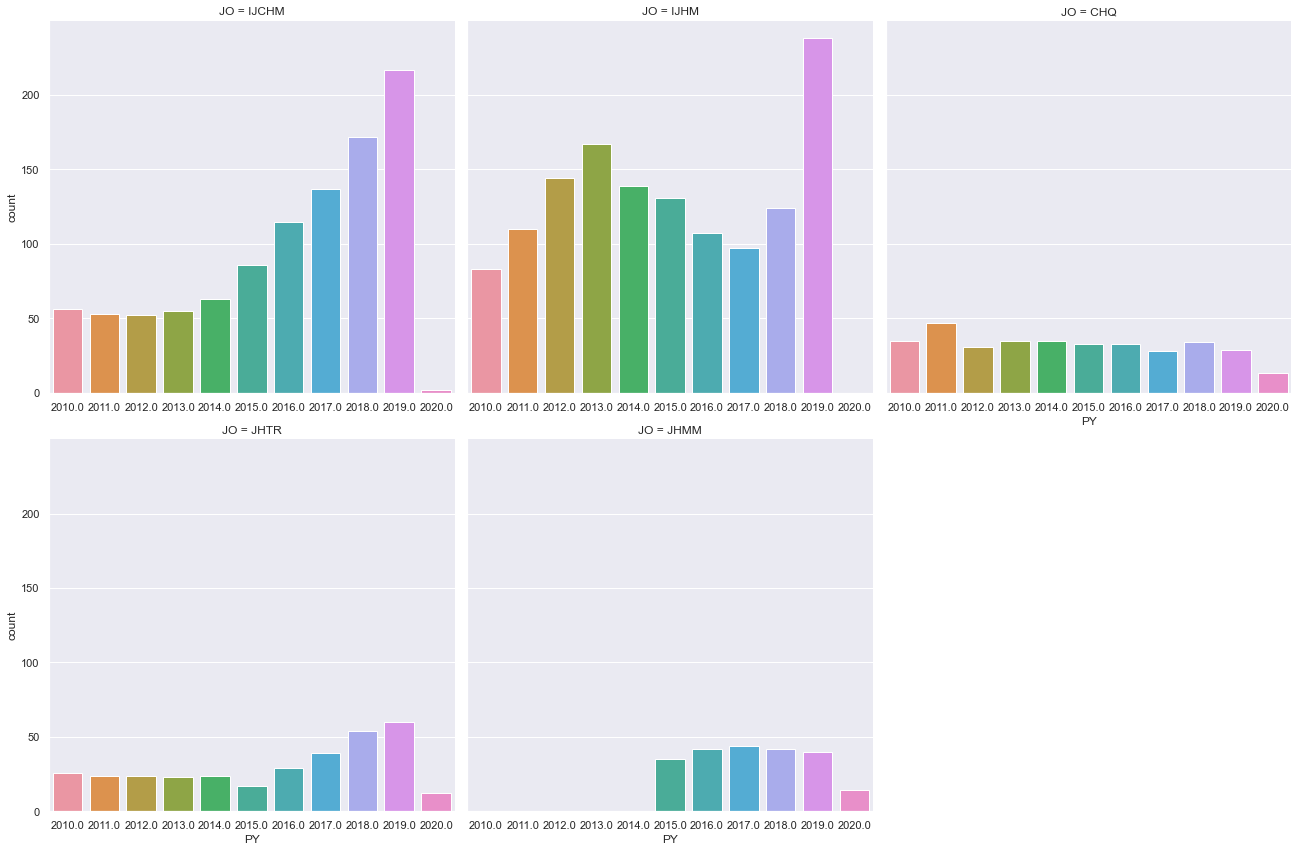

In [128]:
sns.set(font_scale=1)
sns.catplot(data=df_1, x='PY', col="JO", col_wrap=3, sharex=False, height=6, kind='count');

In [129]:
df_1.QUANTITATIVE.value_counts()

1          2655
0           610
BOTH(1)       1
Name: QUANTITATIVE, dtype: int64

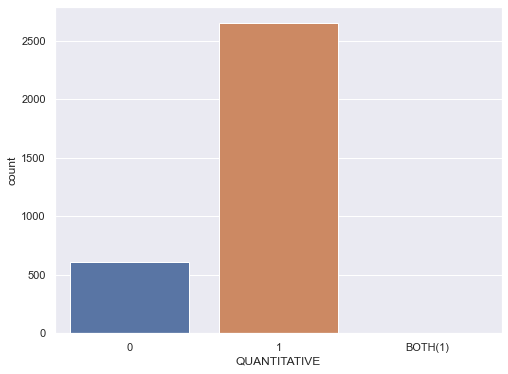

In [130]:
plt.figure(figsize=(8,6))
sns.countplot(x='QUANTITATIVE', data=df_1);

In [131]:
df_1.Method.value_counts()

survey            1509
secondary data     329
experimental       305
panel              206
qualitative        187
                  ... 
theoritical          1
thereotical          1
surver               1
etnographic          1
reviev               1
Name: Method, Length: 68, dtype: int64

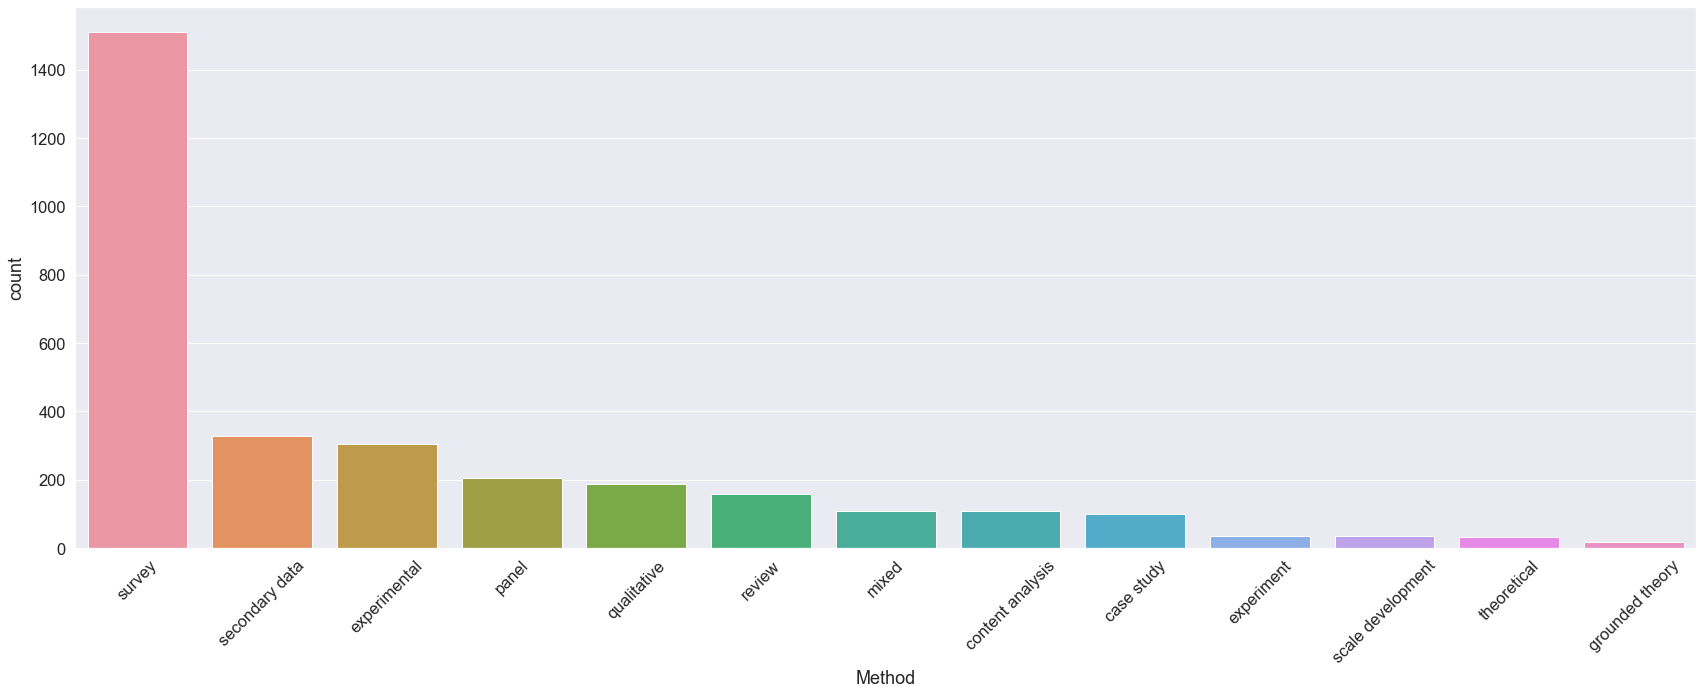

In [132]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=1.5)

plt.figure(figsize=(24,10))
sns.countplot(x='Method', data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), order=order);

plt.xticks(rotation=45)
plt.tight_layout()

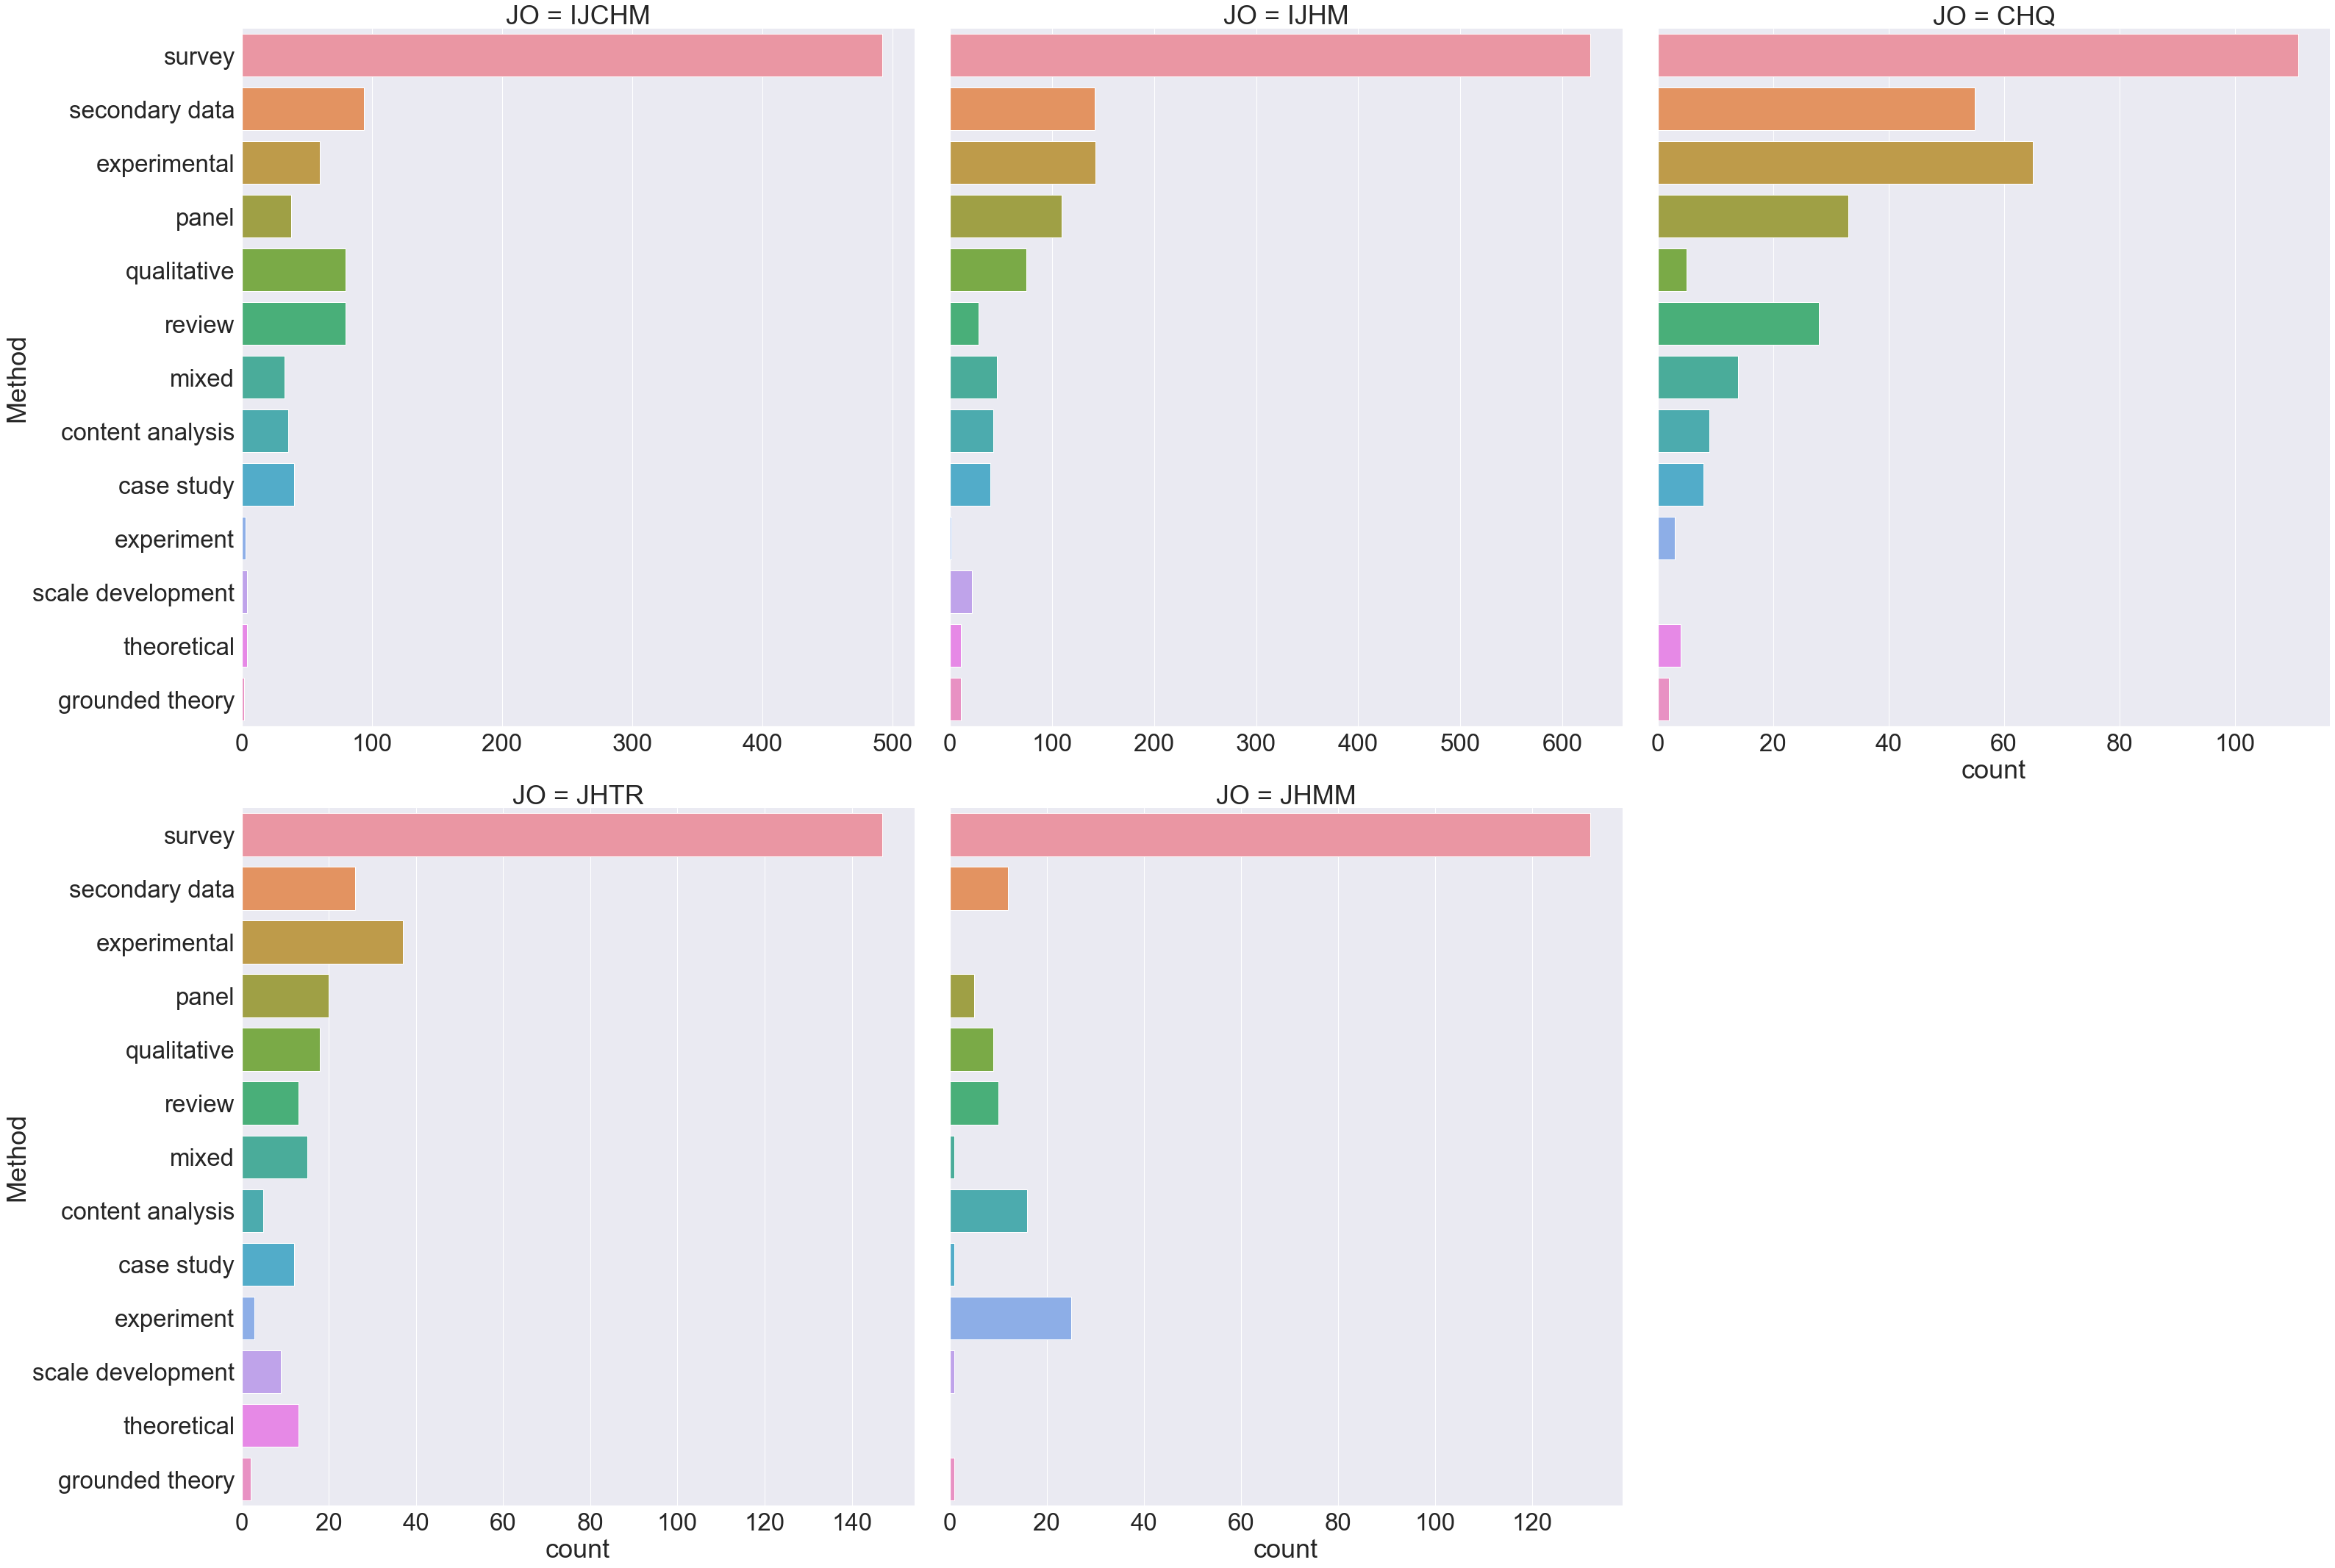

In [133]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=3)

# plt.figure(figsize=(40,25))

sns.catplot(y="Method", col="JO",
                data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), kind="count", col_wrap=3,
                order=order, height=15, aspect=1, sharex=False);


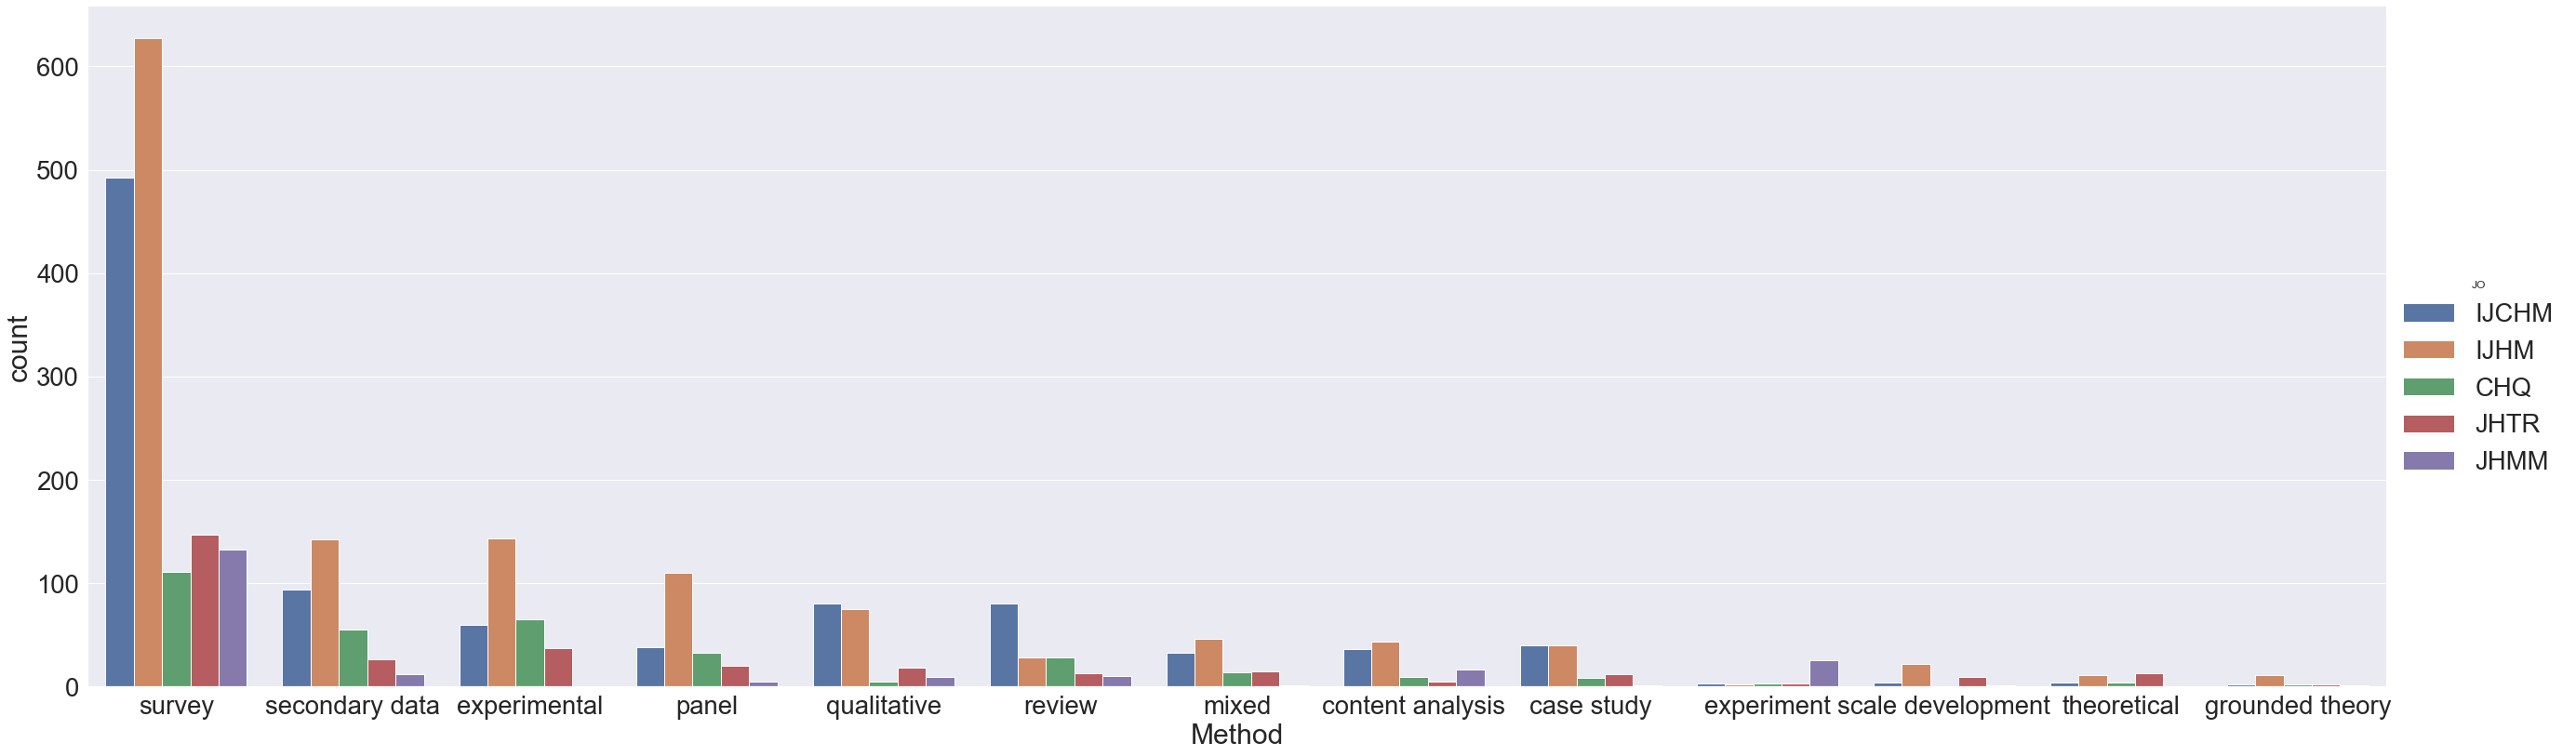

In [134]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=2.5)

# plt.figure(figsize=(40,25))

sns.catplot(x="Method", hue="JO",
                data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), kind="count", 
                order=order, height=12, aspect=3);

In [135]:
df_filtered = df_1.groupby('Method').filter(lambda x: len(x) >= 10)
df_filtered

,JO,AU,TI,PY,DI,QUANTITATIVE,Method,category,CMB,CMV,...,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF,Unnamed: 31
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,IJCHM,"Gricar, S; Bojnec, S",Prices of short-stay accommodation: time serie...,2019.0,10.1108/IJCHM-01-2019-0091,1,panel,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df_gr = df_filtered.groupby("JO")["Method"].value_counts()
df_gr

JO    Method           
CHQ   survey               111
      experimental          65
      secondary data        55
      panel                 33
      review                28
                          ... 
JHTR  case study            12
      scale development      9
      content analysis       5
      experiment             3
      grounded theory        2
Name: Method, Length: 62, dtype: int64

In [137]:
df_gr = df_gr.reset_index(name="Percentage")

In [138]:
df_gr['Percentage'] = df_gr['Percentage'].div(df_gr.groupby('JO')['Percentage'].transform(sum))*100
print(df_gr)

      JO             Method  Percentage
0    CHQ             survey   32.937685
1    CHQ       experimental   19.287834
2    CHQ     secondary data   16.320475
3    CHQ              panel    9.792285
4    CHQ             review    8.308605
..   ...                ...         ...
57  JHTR         case study    3.750000
58  JHTR  scale development    2.812500
59  JHTR   content analysis    1.562500
60  JHTR         experiment    0.937500
61  JHTR    grounded theory    0.625000

[62 rows x 3 columns]


In [142]:
# sns.set(font_scale=1)

# plt.figure(figsize=(25,15))

# sns.barplot(x="Method", y="Percentage", data=df_gr, hue = "JO");

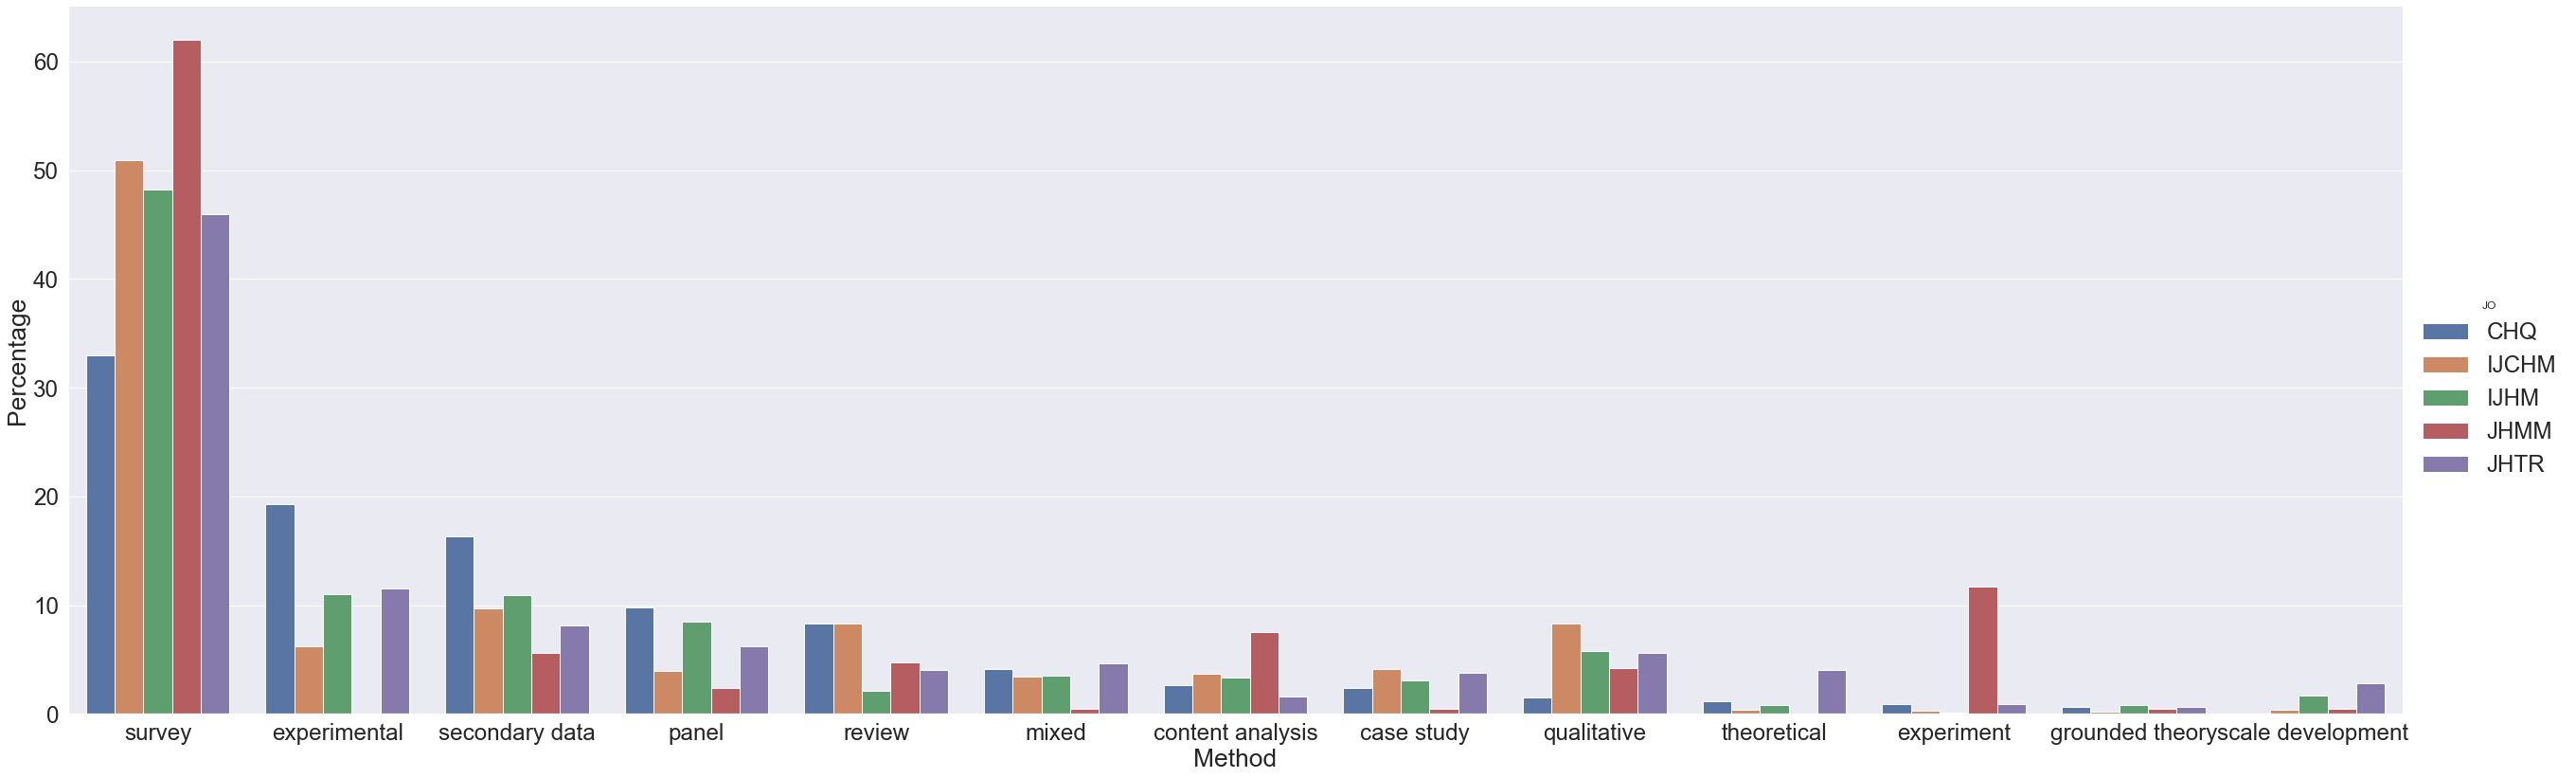

In [143]:
sns.set(font_scale=2.2)

sns.catplot(x="Method", y= "Percentage", hue="JO", data=df_gr, kind="bar", height=12, aspect=3);